<H1> PREDICT IF THE SERVER WILL BE HACKED </H1>

<h1> Import train and test data </h1>

In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
print(train_df.head(5))
print(test_df.head(5))

  INCIDENT_ID       DATE  X_1  X_2  X_3  X_4  X_5  X_6  X_7  X_8  X_9  X_10  \
0   CR_102659  04-JUL-04    0   36   34    2    1    5    6    1    6     1   
1   CR_189752  18-JUL-17    1   37   37    0    0   11   17    1    6     1   
2   CR_184637  15-MAR-17    0    3    2    3    5    1    0    2    3     1   
3   CR_139071  13-FEB-09    0   33   32    2    1    7    1    1    6     1   
4   CR_109335  13-APR-05    0   33   32    2    1    8    3    0    5     1   

   X_11  X_12  X_13  X_14  X_15  MULTIPLE_OFFENSE  
0   174   1.0    92    29    36                 0  
1   236   1.0   103   142    34                 1  
2   174   1.0   110    93    34                 1  
3   249   1.0    72    29    34                 1  
4   174   0.0   112    29    43                 1  
  INCIDENT_ID       DATE  X_1  X_2  X_3  X_4  X_5  X_6  X_7  X_8  X_9  X_10  \
0   CR_195453  01-FEB-18    0   30   35    7    3    6    4    0    5     1   
1   CR_103520  05-MAR-04    0   44   44    1    3    7 

In [3]:
train_df.dtypes

INCIDENT_ID          object
DATE                 object
X_1                   int64
X_2                   int64
X_3                   int64
X_4                   int64
X_5                   int64
X_6                   int64
X_7                   int64
X_8                   int64
X_9                   int64
X_10                  int64
X_11                  int64
X_12                float64
X_13                  int64
X_14                  int64
X_15                  int64
MULTIPLE_OFFENSE      int64
dtype: object

<h1> EDA </h1>

In [4]:
train_df.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


In [5]:
train_df.isnull()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23851,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
23852,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
23853,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
23854,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
test_df.isnull()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15898,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15899,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15900,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15901,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Count NULL values and replace them with maximum count value

In [7]:
train_df.isnull().sum()

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

In [8]:
test_df.isnull().sum()

INCIDENT_ID      0
DATE             0
X_1              0
X_2              0
X_3              0
X_4              0
X_5              0
X_6              0
X_7              0
X_8              0
X_9              0
X_10             0
X_11             0
X_12           127
X_13             0
X_14             0
X_15             0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
train_df['X_12'].value_counts()

1.0     15674
0.0      5171
2.0      2039
3.0       476
4.0       176
5.0        59
6.0        36
8.0         9
10.0        7
9.0         6
7.0         4
11.0        4
15.0        2
20.0        2
17.0        1
58.0        1
50.0        1
40.0        1
16.0        1
90.0        1
12.0        1
30.0        1
14.0        1
Name: X_12, dtype: int64

In [11]:
test_df['X_12'].value_counts()

1.0     10530
0.0      3346
2.0      1381
3.0       321
4.0       100
5.0        42
6.0        23
7.0        10
8.0         9
10.0        4
9.0         3
11.0        2
20.0        1
40.0        1
14.0        1
12.0        1
18.0        1
Name: X_12, dtype: int64

In [12]:
import numpy as np

In [13]:
train_df['X_12'].replace(np.nan,1.0,inplace=True)

In [14]:
test_df['X_12'].replace(np.nan,1.0,inplace=True)

In [15]:
train_df.isnull().sum()

INCIDENT_ID         0
DATE                0
X_1                 0
X_2                 0
X_3                 0
X_4                 0
X_5                 0
X_6                 0
X_7                 0
X_8                 0
X_9                 0
X_10                0
X_11                0
X_12                0
X_13                0
X_14                0
X_15                0
MULTIPLE_OFFENSE    0
dtype: int64

In [16]:
test_df.isnull().sum()

INCIDENT_ID    0
DATE           0
X_1            0
X_2            0
X_3            0
X_4            0
X_5            0
X_6            0
X_7            0
X_8            0
X_9            0
X_10           0
X_11           0
X_12           0
X_13           0
X_14           0
X_15           0
dtype: int64

Check correlation between data

In [17]:
corr_data=train_df.corr()

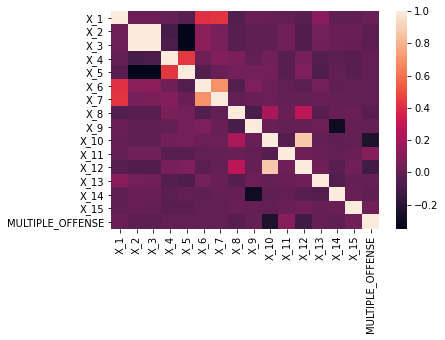

In [18]:
heat_map = sns.heatmap(corr_data)
plt.show()

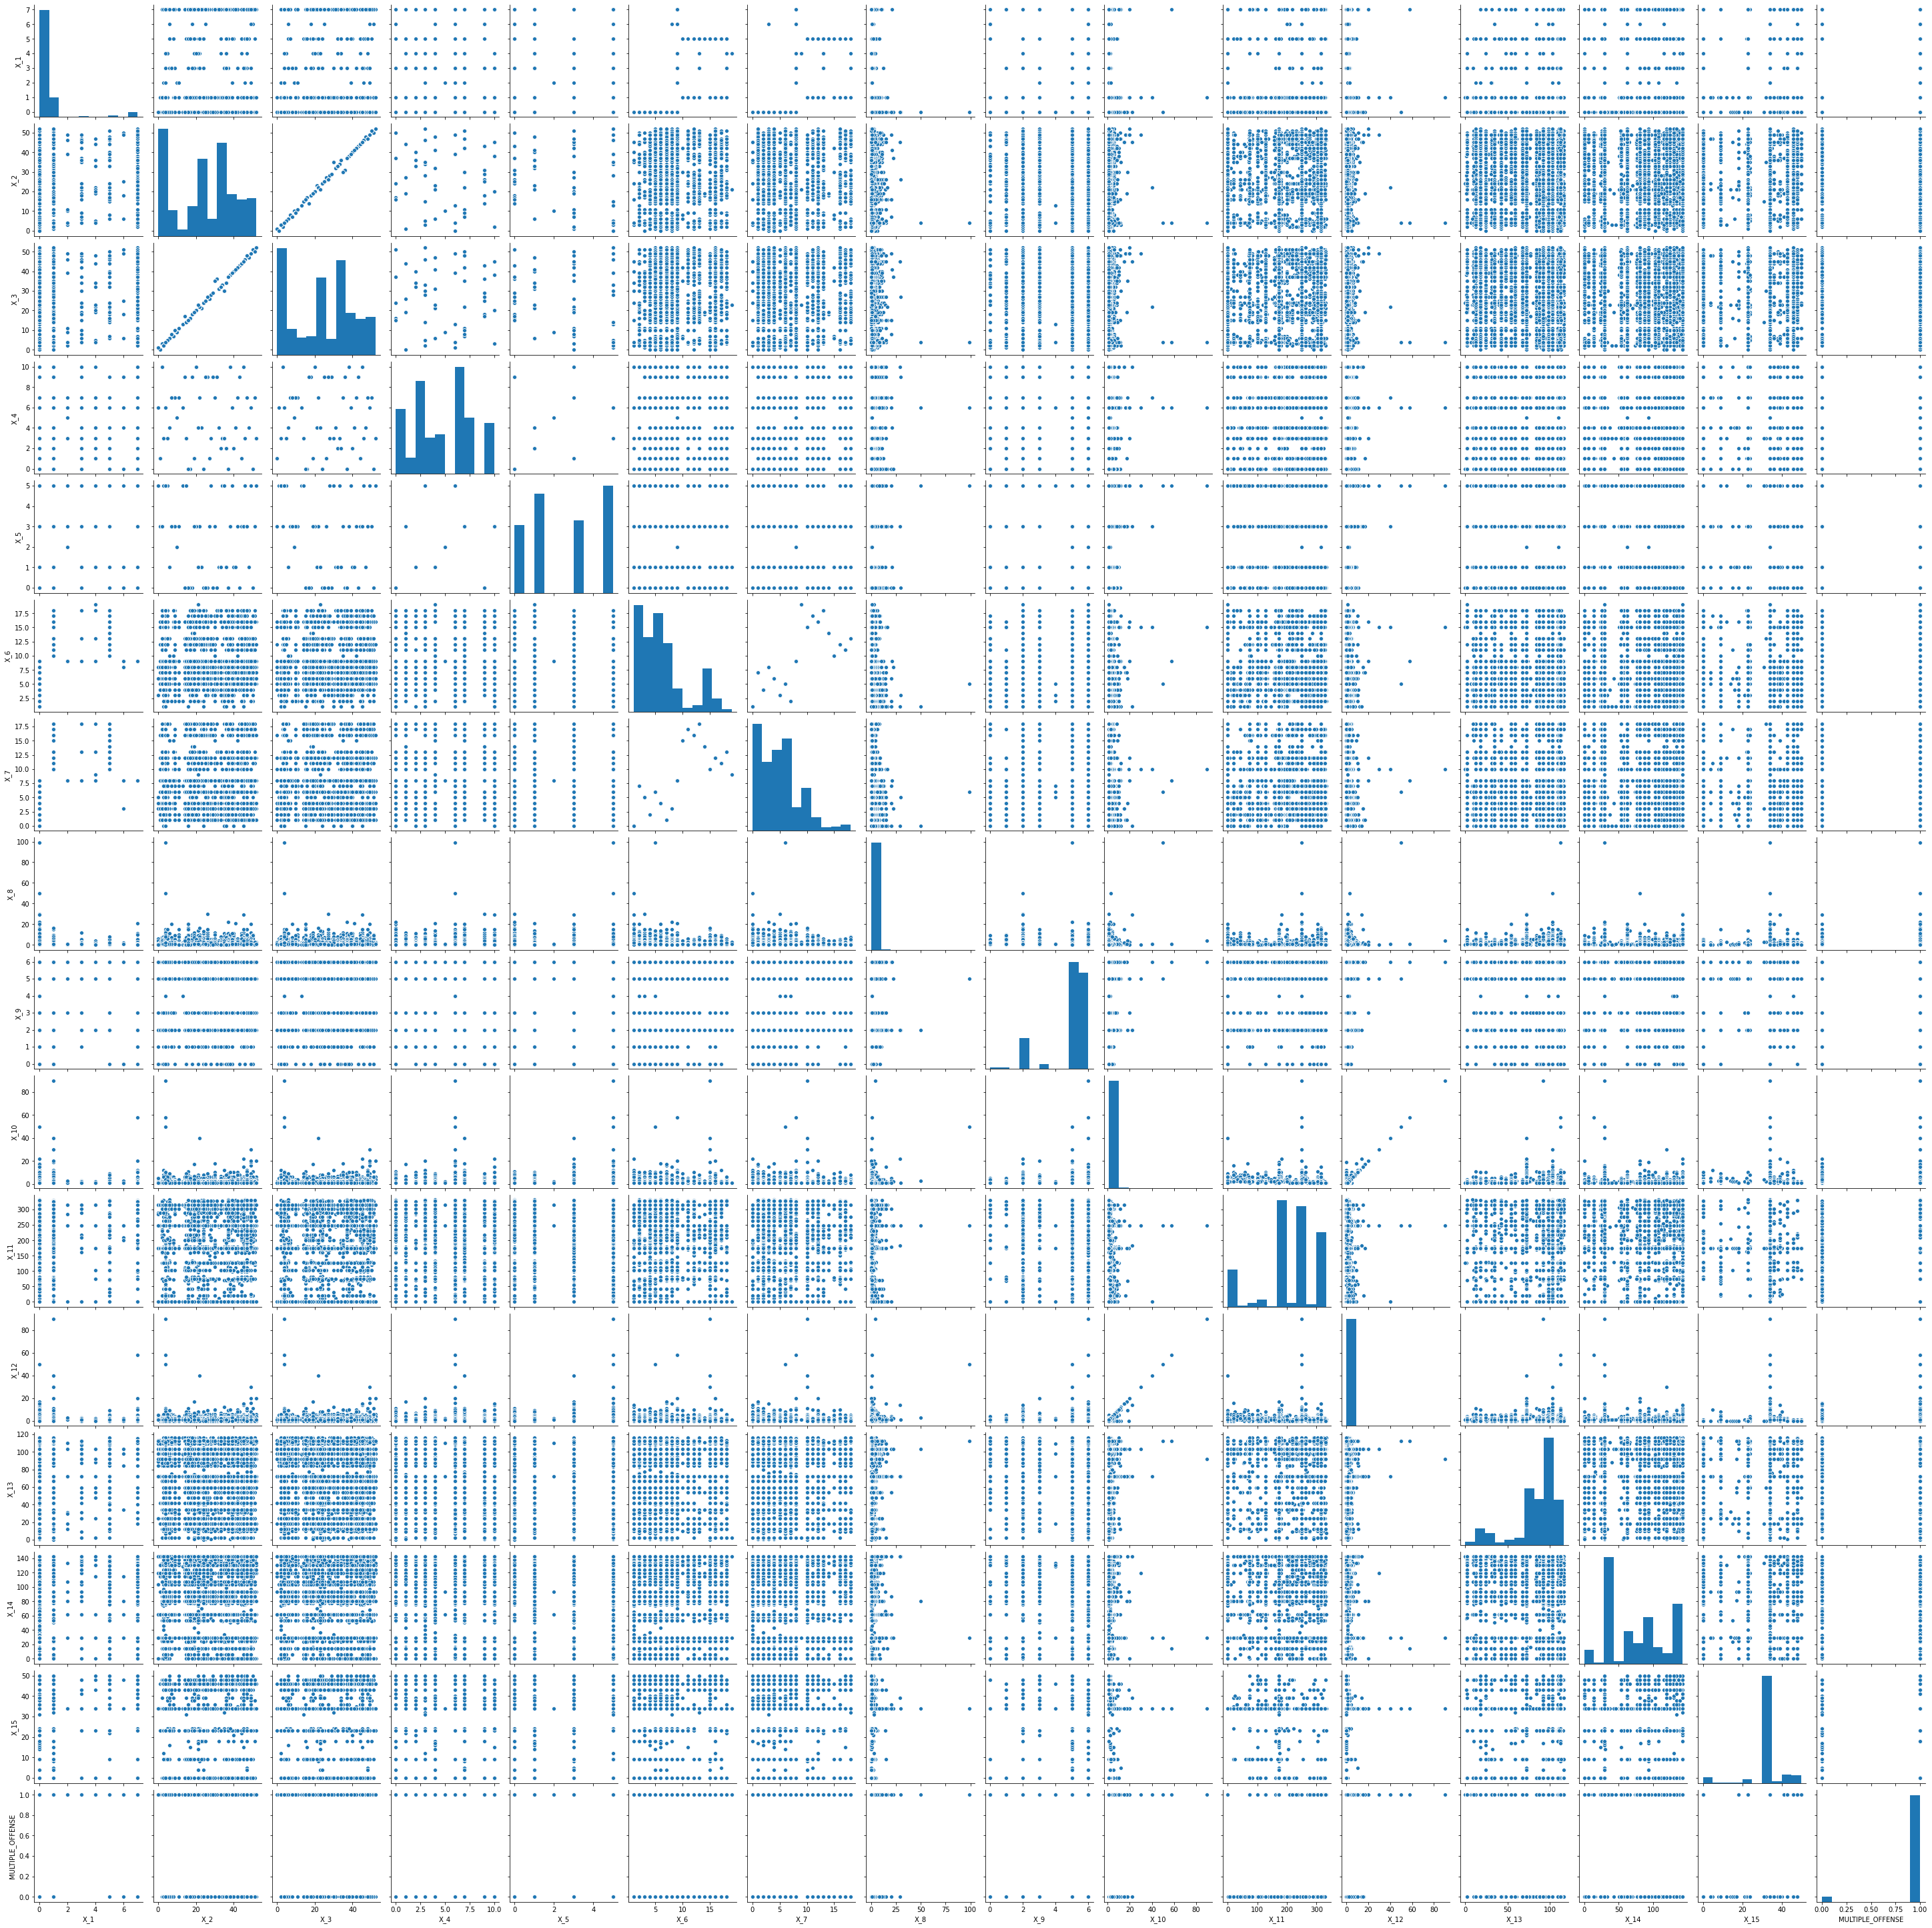

In [19]:
sns.pairplot(train_df)

Make Incident Id as Index

In [20]:
train_df = train_df.set_index('INCIDENT_ID')

Load X1 to X15 features in X variable

In [21]:
X=train_df.iloc[:,1:-1] 
X

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
INCIDENT_ID,,,,,,,,,,,,,,,
CR_102659,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36
CR_189752,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34
CR_184637,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34
CR_139071,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34
CR_109335,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CR_88991,1,47,48,7,3,15,10,1,5,1,174,0.0,98,29,34
CR_46369,0,33,32,2,1,5,6,0,5,1,174,0.0,112,29,43
CR_157556,0,25,25,9,0,3,5,1,6,1,174,0.0,10,29,18


Load last target column in Y variable

In [22]:
Y=train_df.iloc[:,-1]
Y

INCIDENT_ID
CR_102659    0
CR_189752    1
CR_184637    1
CR_139071    1
CR_109335    1
            ..
CR_88991     1
CR_46369     1
CR_157556    1
CR_103180    1
CR_22575     1
Name: MULTIPLE_OFFENSE, Length: 23856, dtype: int64

In [24]:
#Load test data into x
x=test_df.iloc[:,2:] 
x

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,0,30,35,7,3,6,4,0,5,1,174,1.0,72,119,23
1,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15898,1,22,22,7,3,15,10,0,5,1,174,0.0,72,29,43
15899,0,35,30,3,5,1,0,2,3,2,0,2.0,72,93,34
15900,0,26,27,9,0,6,4,2,6,1,0,1.0,72,62,34
15901,0,21,23,4,1,2,7,1,6,2,249,2.0,92,62,34


<h1> Use Random Forest Classifier </h1>

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train = X
Y_train = Y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

By using TRAINING data we calculate accuracy (just to check)

In [26]:
from sklearn.metrics import accuracy_score
random_forest = RandomForestClassifier(n_estimators=50)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
accuracy_score(y_test, Y_pred)

0.9921249841229519

In [27]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, Y_pred))
print(metrics.classification_report(y_test, Y_pred))

[[ 324   50]
 [  12 7487]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       374
           1       0.99      1.00      1.00      7499

    accuracy                           0.99      7873
   macro avg       0.98      0.93      0.95      7873
weighted avg       0.99      0.99      0.99      7873



<h1> List important features </h1>

In [28]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [29]:
print(model.feature_importances_)

[0.00206029 0.01525088 0.01587375 0.008836   0.00872046 0.00650218
 0.00517415 0.01208187 0.00763251 0.22837431 0.43338422 0.10723681
 0.0086467  0.00504269 0.13518319]


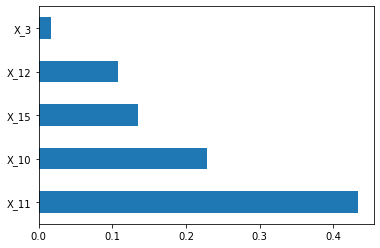

In [30]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

<h1> We will take only top 5 important features and then perform Classifier to increase accuracy </h1>

In [31]:
X=train_df[['X_11', 'X_10', 'X_15', 'X_12', 'X_3']]
X

,X_11,X_10,X_15,X_12,X_3
INCIDENT_ID,,,,,
CR_102659,174,1,36,1.0,34
CR_189752,236,1,34,1.0,37
CR_184637,174,1,34,1.0,2
CR_139071,249,1,34,1.0,32
CR_109335,174,1,43,0.0,32
...,...,...,...,...,...
CR_88991,174,1,34,0.0,48
CR_46369,174,1,43,0.0,32
CR_157556,174,1,18,0.0,25


In [32]:
x=test_df[['X_11', 'X_10', 'X_15', 'X_12', 'X_3']]
x

,X_11,X_10,X_15,X_12,X_3
0,174,1,23,1.0,35
1,316,1,34,0.0,44
2,316,1,34,1.0,33
3,174,1,34,1.0,2
4,174,1,43,0.0,8
...,...,...,...,...,...
15898,174,1,43,0.0,22
15899,0,2,34,2.0,30
15900,0,1,34,1.0,27
15901,249,2,34,2.0,23


In [33]:
#PERFORM RANDOM FOREST AGAIN TO CHECK ACCURACY 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train = X
Y_train = Y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [34]:
from sklearn.metrics import accuracy_score
random_forest = RandomForestClassifier(n_estimators=50)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
accuracy_score(y_test, Y_pred)

0.9978407214530675

In [35]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, Y_pred))
print(metrics.classification_report(y_test, Y_pred))

[[ 365    9]
 [   8 7491]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       374
           1       1.00      1.00      1.00      7499

    accuracy                           1.00      7873
   macro avg       0.99      0.99      0.99      7873
weighted avg       1.00      1.00      1.00      7873



<h3> We can see that accuracy had increased due to removal of extra features </h3>
<h3> Now by using TESTING data we predict output values </h3>

In [36]:
X_train = X
Y_train = Y
X_actual_test  = x

In [37]:
random_forest = RandomForestClassifier(n_estimators=50)
random_forest.fit(X_train, Y_train)
Y_actual_pred = random_forest.predict(X_actual_test)

Test data to csv file

In [38]:
submission = pd.DataFrame({
        "INCIDENT_ID": test_df["INCIDENT_ID"],
        "MULTIPLE_OFFENSE": Y_actual_pred
    })
submission.to_csv('Final_test_data.csv', index=False)